# Latar Belakang

AWS adalah sebuah layanan cloud computing dari Amazon yaitu sebuah perusahaan yang termasuk ke dalam top big five tecnologies companies di Amerika Serikat. AWS adalah Amazon Web Service memiliki layanan SaaS (Software as a service) melakukan pelayanan lintas negara dan benua, hampir ke seluruh penjuru dunia namun tidak semua dari transaksi yang dilakukan profitable


# Pernyataan Masalah

Pada data penjualan atau Saas sales perusahaan ingin mengetahui sejauh mana tingkat Profitabilities, Sales, dan Quantity dari seluruh dunia. Selanjutnya apakah langkah yang diambil oleh perusahaan sudah benar, Informasi ini akan membantu perusahaan dalam menentukan strategi baik dalam marketing atau lainya.
Untuk selanjutnya kita akan mencoba menjawab pertanyaan berikut:
* Bagaimana cara yang tepat untuk meningkatkan profit perusahaan secara efektif?

# Data

Untuk mengetahui pernyataan tersebut, kita akan mencoba menganalisa data AWS Saas Sales. Data dapat diakses [disini](https://www.kaggle.com/datasets/nnthanh101/aws-saas-sales)

In [85]:
import pandas as pd
import numpy as np
import seaborn as sb
import seaborn as sns
import matplotlib.pyplot as plt
from tabulate import tabulate

Dataset ini berisi tentang transaksi yang dilakukan perusahaan, Ada 19 kolom di dalam AWS Saas sales yaitu:

1. Row ID       : ID unique untuk setiap transaction.
2. Order ID     : ID unique untuk setiap data order.
3. Order Date   : Tanggal data pemesanan.
4. Date Key     : Angka tanggal numerik order format (YYYYMMDD).
5. Contact Name : Nama orang yang melakukan order.
6. Country      : Negara tempat pemesanan dilakukan.
7. City         : Kota tempat pemesanan dilakukan.
8. Region       : Wilayah tempat pemesanan dilakukan.
9. Subregion    : Subwilayah tempat pemesanan dilakukan.
10. Customer    : Nama perusahaan yang melakukan pemesanan.
11. Customer ID : ID unique untuk setiap customer.
12. Industry    : Industry dari perusahaan customer.
13. Segment     : Segment persuahaan customer (SMB, Strategic, Enterprise, etc.).
14. Product     : Product yang dipesan.
15. License     : Lisensi untuk product.
16. Sales       : Jumlah total penjualan untuk setiap transaction.
17. Quantity    : Jumlah total item untuk setiap transaction.
18. Discount    : Discount yang diberikan pada transaction.
19. Profit      : Keuntungan dari transaction.

In [61]:
DataSaas = pd.read_csv("SaaS-Sales.csv")
DataSaas

,Row ID,Order ID,Order Date,Date Key,Contact Name,Country,City,Region,Subregion,Customer,Customer ID,Industry,Segment,Product,License,Sales,Quantity,Discount,Profit
0,1,EMEA-2022-152156,11/9/2022,20221109,Nathan Bell,Ireland,Dublin,EMEA,UKIR,Chevron,1017,Energy,SMB,Marketing Suite,16GRM07R1K,261.9600,2,0.00,41.9136
1,2,EMEA-2022-152156,11/9/2022,20221109,Nathan Bell,Ireland,Dublin,EMEA,UKIR,Chevron,1017,Energy,SMB,FinanceHub,QLIW57KZUV,731.9400,3,0.00,219.5820
2,3,AMER-2022-138688,6/13/2022,20220613,Deirdre Bailey,United States,New York City,AMER,NAMER,Phillips 66,1056,Energy,Strategic,FinanceHub,JI6BVL70HQ,14.6200,2,0.00,6.8714
3,4,EMEA-2021-108966,10/11/2021,20211011,Zoe Hodges,Germany,Stuttgart,EMEA,EU-WEST,Royal Dutch Shell,1031,Energy,SMB,ContactMatcher,DE9GJKGD44,957.5775,5,0.45,-383.0310
4,5,EMEA-2021-108966,10/11/2021,20211011,Zoe Hodges,Germany,Stuttgart,EMEA,EU-WEST,Royal Dutch Shell,1031,Energy,SMB,Marketing Suite - Gold,OIF7NY23WD,22.3680,2,0.20,2.5164
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9989,9990,EMEA-2020-110422,1/22/2020,20200122,Dan Allan,Germany,Hamburg,EMEA,EU-WEST,Johnson & Johnson,1055,Healthcare,SMB,SaaS Connector Pack,ETHXMB5TMD,25.2480,3,0.20,4.1028
9990,9991,AMER-2023-121258,2/27/2023,20230227,Anthony Sanderson,United States,Milwaukee,AMER,NAMER,American Express,1005,Finance,SMB,SaaS Connector Pack,LYHOKTRY7L,91.9600,2,0.00,15.6332
9991,9992,AMER-2023-121258,2/27/2023,20230227,Anthony Sanderson,United States,Milwaukee,AMER,NAMER,American Express,1005,Finance,SMB,Site Analytics,I5SVMI6M88,258.5760,2,0.20,19.3932
9992,9993,AMER-2023-121258,2/27/2023,20230227,Anthony Sanderson,United States,Milwaukee,AMER,NAMER,American Express,1005,Finance,SMB,Support,JHLW4P6LQ2,29.6000,4,0.00,13.3200


## Data Understanding and Cleaning

Untuk melakukan analisa data kita perlu mengenal terlebih dahulu bagaimana sifat dari data atau biasa disebut dengan *data understanding*. Dari proses ini kita akan tahu anomali apa saja yang terdapat di dalam dataset dan perlu ditangani dalam tahapan *data cleaning* untuk menangani *Missing Value* atau nilai yang hilang adalah data yang kosong atau tidak terisi dalam suatu dataset

In [62]:
print('Missing Value pada setiap kolom')
print(DataSaas.isnull().sum())

Missing Value pada setiap kolom
Row ID          0
Order ID        0
Order Date      0
Date Key        0
Contact Name    0
Country         0
City            0
Region          0
Subregion       0
Customer        0
Customer ID     0
Industry        0
Segment         0
Product         0
License         0
Sales           0
Quantity        0
Discount        0
Profit          0
dtype: int64


Dapat dilihat pada jumlah data diatas dan gambar dibawah data Saas Sales ini tidak ditemukanya missing value artinya semua data lengkap dan terisi

<Axes: >

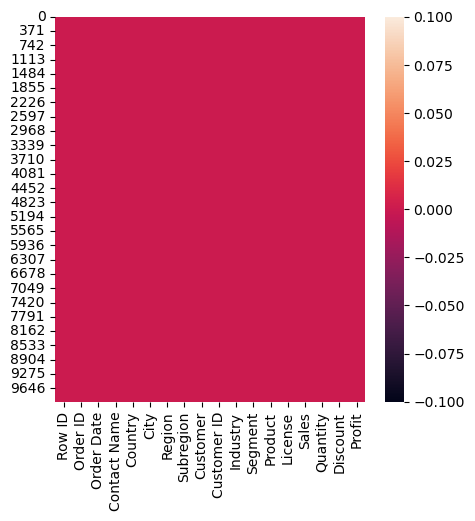

In [63]:
plt.figure(figsize=(5,5))
sns.heatmap(DataSaas[['Row ID','Order ID','Order Date','Contact Name','Country','City','Region','Subregion','Customer','Customer ID', 'Industry', 'Segment', 'Product', 'License', 'Sales', 'Quantity', 'Discount', 'Profit']].isna())

Selanjutnya duplikat data juga tidak ditemukan dalam dataset Saas Sales ini maka data dapat dilanjutkan ke proses selanjutnya

In [64]:
print('Terdapat data Duplikat sebanyak')
len(DataSaas)-len(DataSaas.drop_duplicates())

Terdapat data Duplikat sebanyak


0

Agar menghindari data crash diperlukan copy data untuk uji coba eksperimen

In [65]:
df_saas = DataSaas.copy()
df_saas.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 19 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Row ID        9994 non-null   int64  
 1   Order ID      9994 non-null   object 
 2   Order Date    9994 non-null   object 
 3   Date Key      9994 non-null   int64  
 4   Contact Name  9994 non-null   object 
 5   Country       9994 non-null   object 
 6   City          9994 non-null   object 
 7   Region        9994 non-null   object 
 8   Subregion     9994 non-null   object 
 9   Customer      9994 non-null   object 
 10  Customer ID   9994 non-null   int64  
 11  Industry      9994 non-null   object 
 12  Segment       9994 non-null   object 
 13  Product       9994 non-null   object 
 14  License       9994 non-null   object 
 15  Sales         9994 non-null   float64
 16  Quantity      9994 non-null   int64  
 17  Discount      9994 non-null   float64
 18  Profit        9994 non-null 

Secara umum kita dapat melihat bahwa data:

* Tidak memiliki Missing Value
* Data tidak ada yang duplikat
* Order date masih memliki type object seharusnya data order bertype datetime maka perlu dilakukan perubahan type data
* Kolom Date Key berisi tentang data order namun secara numerik maka akan dilakukan drop karena kita sudah mempunyai order date yang memliki fungsi yang sama
* Row ID adalah nilai unique maka sebaiknya bertype data str atau object 
* Costumer ID juga sebagai nilai unique pada costumer dalam dataset maka sebaiknya bertype data str atau object



In [66]:
df_saas.drop(columns= ['Date Key'])

,Row ID,Order ID,Order Date,Contact Name,Country,City,Region,Subregion,Customer,Customer ID,Industry,Segment,Product,License,Sales,Quantity,Discount,Profit
0,1,EMEA-2022-152156,11/9/2022,Nathan Bell,Ireland,Dublin,EMEA,UKIR,Chevron,1017,Energy,SMB,Marketing Suite,16GRM07R1K,261.9600,2,0.00,41.9136
1,2,EMEA-2022-152156,11/9/2022,Nathan Bell,Ireland,Dublin,EMEA,UKIR,Chevron,1017,Energy,SMB,FinanceHub,QLIW57KZUV,731.9400,3,0.00,219.5820
2,3,AMER-2022-138688,6/13/2022,Deirdre Bailey,United States,New York City,AMER,NAMER,Phillips 66,1056,Energy,Strategic,FinanceHub,JI6BVL70HQ,14.6200,2,0.00,6.8714
3,4,EMEA-2021-108966,10/11/2021,Zoe Hodges,Germany,Stuttgart,EMEA,EU-WEST,Royal Dutch Shell,1031,Energy,SMB,ContactMatcher,DE9GJKGD44,957.5775,5,0.45,-383.0310
4,5,EMEA-2021-108966,10/11/2021,Zoe Hodges,Germany,Stuttgart,EMEA,EU-WEST,Royal Dutch Shell,1031,Energy,SMB,Marketing Suite - Gold,OIF7NY23WD,22.3680,2,0.20,2.5164
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9989,9990,EMEA-2020-110422,1/22/2020,Dan Allan,Germany,Hamburg,EMEA,EU-WEST,Johnson & Johnson,1055,Healthcare,SMB,SaaS Connector Pack,ETHXMB5TMD,25.2480,3,0.20,4.1028
9990,9991,AMER-2023-121258,2/27/2023,Anthony Sanderson,United States,Milwaukee,AMER,NAMER,American Express,1005,Finance,SMB,SaaS Connector Pack,LYHOKTRY7L,91.9600,2,0.00,15.6332
9991,9992,AMER-2023-121258,2/27/2023,Anthony Sanderson,United States,Milwaukee,AMER,NAMER,American Express,1005,Finance,SMB,Site Analytics,I5SVMI6M88,258.5760,2,0.20,19.3932
9992,9993,AMER-2023-121258,2/27/2023,Anthony Sanderson,United States,Milwaukee,AMER,NAMER,American Express,1005,Finance,SMB,Support,JHLW4P6LQ2,29.6000,4,0.00,13.3200


In [67]:
df_saas['Row ID'] = df_saas['Row ID'].astype(str)
df_saas['Customer ID'] = df_saas['Customer ID'].astype(str)

In [68]:
df_saas['Order Date'] = pd.to_datetime(df_saas['Order Date'], format= "%m/%d/%Y")
df_saas.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 19 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   Row ID        9994 non-null   object        
 1   Order ID      9994 non-null   object        
 2   Order Date    9994 non-null   datetime64[ns]
 3   Date Key      9994 non-null   int64         
 4   Contact Name  9994 non-null   object        
 5   Country       9994 non-null   object        
 6   City          9994 non-null   object        
 7   Region        9994 non-null   object        
 8   Subregion     9994 non-null   object        
 9   Customer      9994 non-null   object        
 10  Customer ID   9994 non-null   object        
 11  Industry      9994 non-null   object        
 12  Segment       9994 non-null   object        
 13  Product       9994 non-null   object        
 14  License       9994 non-null   object        
 15  Sales         9994 non-null   float64 

Data Saas sales ini diperoleh dari 2020 sampai 2023 artinya ada 9994 transaksi dalam 4 tahun terakhir, Maka secara keseluruhan banyak baris 9994 dan 19 kolom

In [69]:
sortbydate = df_saas.sort_values(by='Order Date')
sortbydate

,Row ID,Order ID,Order Date,Date Key,Contact Name,Country,City,Region,Subregion,Customer,Customer ID,Industry,Segment,Product,License,Sales,Quantity,Discount,Profit
7980,7981,APJ-2020-103800,2020-01-04,20200104,Brian Dickens,Japan,Tokyo,APJ,JAPN,Siemens,1043,Manufacturing,SMB,Support,730VUNTJF5,16.448,2,0.2,5.5512
739,740,APJ-2020-112326,2020-01-05,20200105,Liam Churchill,Australia,Wollongong,APJ,ANZ,CVS Health,1026,Retail,Enterprise,FinanceHub,XGQWR8K66V,11.784,3,0.2,4.2717
740,741,APJ-2020-112326,2020-01-05,20200105,Liam Churchill,Australia,Wollongong,APJ,ANZ,CVS Health,1026,Retail,Enterprise,Marketing Suite - Gold,54J2FWJY59,272.736,3,0.2,-64.7748
741,742,APJ-2020-112326,2020-01-05,20200105,Liam Churchill,Australia,Wollongong,APJ,ANZ,CVS Health,1026,Retail,Enterprise,ContactMatcher,K3HDHHY5YG,3.540,2,0.8,-5.4870
1759,1760,EMEA-2020-141817,2020-01-06,20200106,Ella Springer,France,Paris,EMEA,EU-WEST,Mitsubishi,1050,Manufacturing,SMB,ChatBot Plugin,PGSY1LZQ71,19.536,3,0.2,4.8840
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5091,5092,EMEA-2023-156720,2023-12-31,20231231,Max Morgan,Russia,Moscow,EMEA,EU-EAST,Tyson Foods,1088,Consumer Products,SMB,Storage,1NXYUPA4CX,3.024,3,0.2,-0.6048
908,909,EMEA-2023-143259,2023-12-31,20231231,Katherine Dowd,United Kingdom,London,EMEA,UKIR,Morgan Stanley,1068,Finance,SMB,ContactMatcher,IHFJIL4RNB,52.776,3,0.2,19.7910
907,908,EMEA-2023-143259,2023-12-31,20231231,Katherine Dowd,United Kingdom,London,EMEA,UKIR,Morgan Stanley,1068,Finance,SMB,Site Analytics,U4EQCPO0OL,90.930,7,0.0,2.7279
1296,1297,AMER-2023-115427,2023-12-31,20231231,Justin Walker,United States,Columbia,AMER,NAMER,Aviva,1006,Finance,Strategic,ContactMatcher,YIM32OGSAB,13.904,2,0.2,4.5188


Setelah data melalui proses data clean maka selanjutnya kita akan coba untuk mengeksplorasi dan observasi pada kolom data Sales, Discount, Profit, Quantity

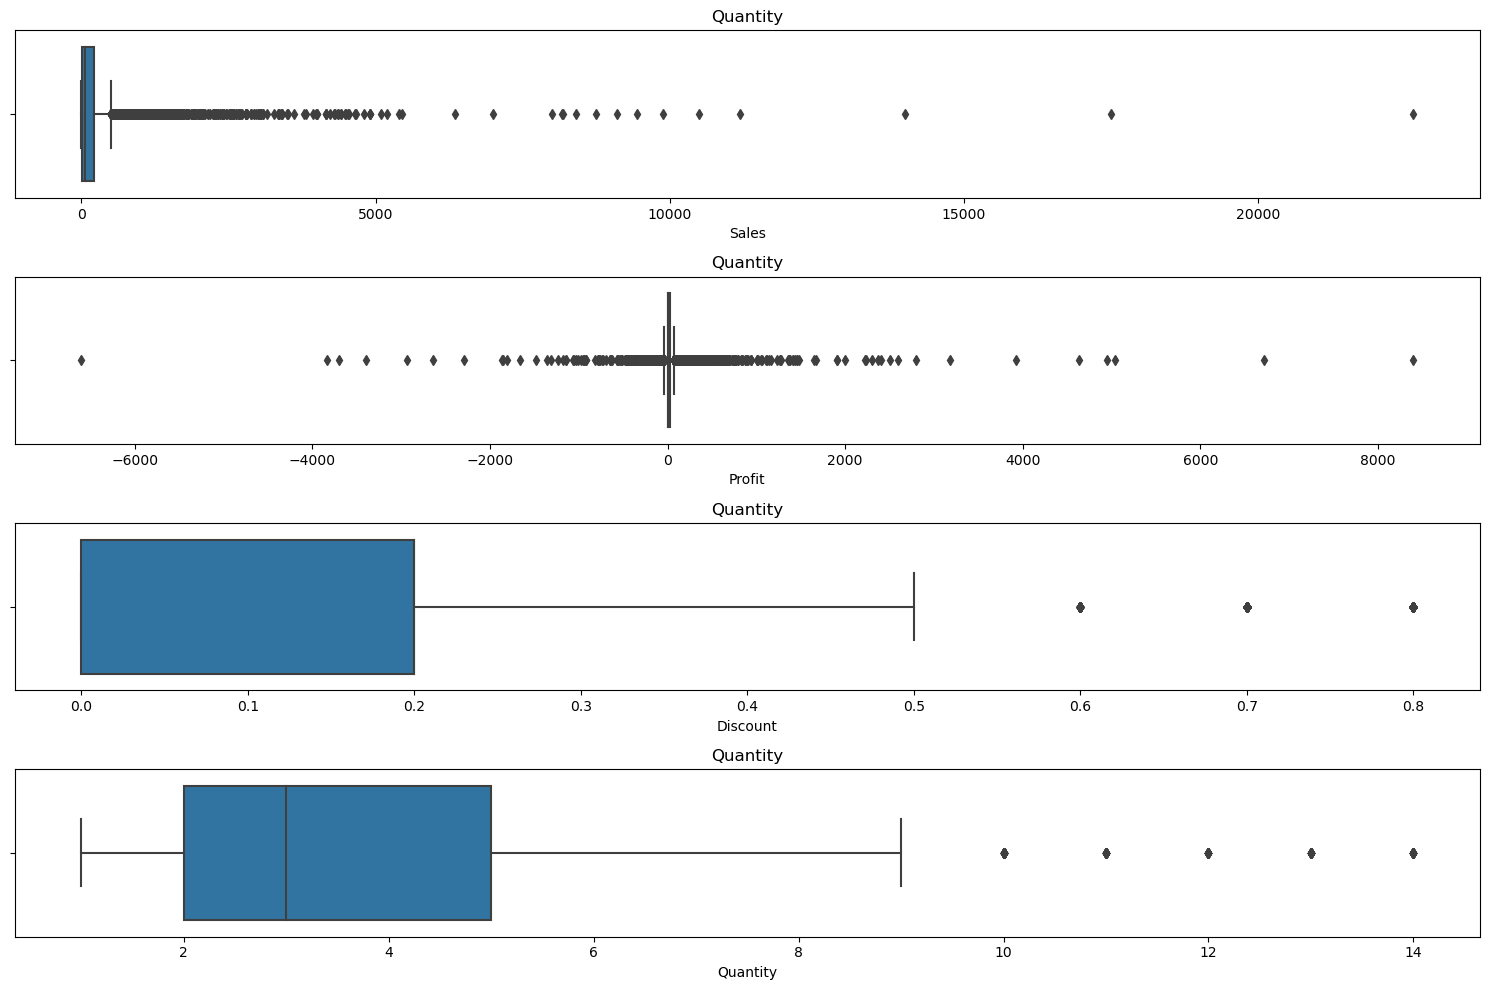

In [70]:
feature = ['Sales', 'Profit', 'Discount', 'Quantity']
plt.figure(figsize=(15, 10))

for x, y in enumerate(feature, start=1):
    plt.subplot(4, 1, x)
    sns.boxplot(x=sortbydate[y])
    plt.title(col)

plt.tight_layout()
plt.show()

Untuk mencari atau mengecek outliers digunakan boxplot untuk melihat sejauh mana outliers pada dataset Saas sales ini

In [71]:
df_saas[['Sales', 'Discount', 'Profit','Quantity']].describe()

,Sales,Discount,Profit,Quantity
count,9994.000000,9994.000000,9994.000000,9994.000000
mean,229.858001,0.156203,28.656896,3.789574
std,623.245101,0.206452,234.260108,2.225110
min,0.444000,0.000000,-6599.978000,1.000000
25%,17.280000,0.000000,1.728750,2.000000
50%,54.490000,0.200000,8.666500,3.000000
75%,209.940000,0.200000,29.364000,5.000000
max,22638.480000,0.800000,8399.976000,14.000000


Suatu data akan terdistribusi secara normal apabila rata-rata nilai variabel atau mean sama dengan median seperti yang dapat kita lihat pada tabel diatas bahwa Q2=median atau nilai tengah, maka tabel 50% kita asumsikan sebagai nilai medianya. Secara Garis besar kita nyatakan bahwa: 

* Sales : Memliki rentang yang jauh antara nilai rata-rata (mean) dengan median (50%)
* Discount : Memiliki rentang nilai yang dekat antara mean dengan median namun ini tidak dapat diasumsikan karena discount paling besar adalah 0.8 atau 80%
* Profit : Memliki rentang yang jauh antara nilai rata-rata (mean) dengan median (50%)
* Quantity : Memiliki rentang nilai yang dekat antara mean dengan median namun ini tidak dapat diasumsikan karena quantity adalah jumlah banyaknya pesanan 

Secara garis besar dapat diasumsikan dan kita sepakati bahwa ke 4 nilai atau dataset Saas sales ini *TIDAK BERDISTRIBUSI NORMAL* 

In [88]:
profit_min = df_saas.groupby(by= "Profit")['Discount'].min().reset_index().sort_values("Profit", ascending= False)
profit_min.tail()

,Profit,Discount
4,-2929.4845,0.8
3,-3399.9800,0.7
2,-3701.8928,0.8
1,-3839.9904,0.5
0,-6599.9780,0.7


In [89]:
sales_min = df_saas.groupby(by= "Sales")['Discount'].min().reset_index().sort_values("Sales", ascending= False)
sales_min.tail()

,Sales,Discount
4,0.876,0.8
3,0.852,0.7
2,0.836,0.8
1,0.556,0.8
0,0.444,0.8


Anomali data atau outlier merujuk pada nilai atau observasi yang signifikan atau tidak biasa dalam suatu dataset dibandingkan dengan nilai-nilai lain dalam dataset tersebut. 

Terdapat keanehan dalam profit paling rendah atau min yakni bernilai minus(-) yakni -6599.9780 maka setelah ditemukan ternyata nilai tersebut berkorelasi dengan nilai discount yang diberikan 0,7 atau kita artikan 70%, hal ini juga terjadi pada sales paling rendah bernilai 0,444 juga sama memiliki nilai discount 0,8

In [87]:
outliers_info = {}
for column in ['Sales', 'Quantity', 'Discount', 'Profit']:
    Q1 = df_saas[column].quantile(0.25)
    Q3 = df_saas[column].quantile(0.75)
    IQR = Q3 - Q1

    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    outliers_condition = (df_saas[column] < lower_bound) | (df_saas[column] > upper_bound)
    outliers = df_saas[outliers_condition]

    outliers_info[column] = {
        'lower_bound': lower_bound,
        'upper_bound': upper_bound,
        'number_of_outliers': outliers_condition.sum(),  
        'outliers_indices': outliers.index.tolist() 
    }

outliers_summary = {key: {'bounds': (value['lower_bound'], value['upper_bound']), 
                          'number_of_outliers': value['number_of_outliers']} 
                    for key, value in outliers_info.items()}

outliers_summary_df = pd.DataFrame.from_dict(outliers_summary, orient='index')
outliers_summary_df[['lower_bound', 'upper_bound']] = outliers_summary_df['bounds'].apply(pd.Series)
outliers_summary_df.drop('bounds', axis=1, inplace=True)
outliers_summary_df = outliers_summary_df[['lower_bound', 'upper_bound', 'number_of_outliers']]
styled_table = outliers_summary_df.style.format('{:.0f}')
styled_table

,lower_bound,upper_bound,number_of_outliers
Sales,-272,499,1167
Quantity,-2,10,170
Discount,-0,0,856
Profit,-40,71,1881


Selanjutnya kita mencari outlier untuk mengetahui sejauh mana nilai ekstrim atau tidak biasa hal ini ditujukan agar kita mengetahui seberapa fluktuatif data tersebut

* Sales : lower bound dan upper bound memiliki nilai yang sangat besar hal ini terjadi karena fluktuasi dari harga tertinggi juga terendah sangat signifikan dan sering terjadi
* Discount : kita tidak dapat menilai bahwa adanya outlier pada kolom discount ini karena lower bound dan upper bound nya dibatas 0
* Profit :  lower bound dan upper bound memiliki nilai yang cukup besar hal ini terjadi karena fluktuasi dari harga tertinggi juga terendah sangat signifikan dan sering terjadi
* Quantity : kolom quantity memiliki jumlah outlier yang relatif kecil karena melihat dari range nya atau jarak antara max dan min nya yang berdekatan

# Analisis Data

Analisis Dilakukan dengan beberapa dengan cara melihat berdasarkan kolom terkait yang dirasa cukup realable yaitu:

Membandingkan Kolom Industry dengan Profit 

Text(0.5, 0, 'Industry')

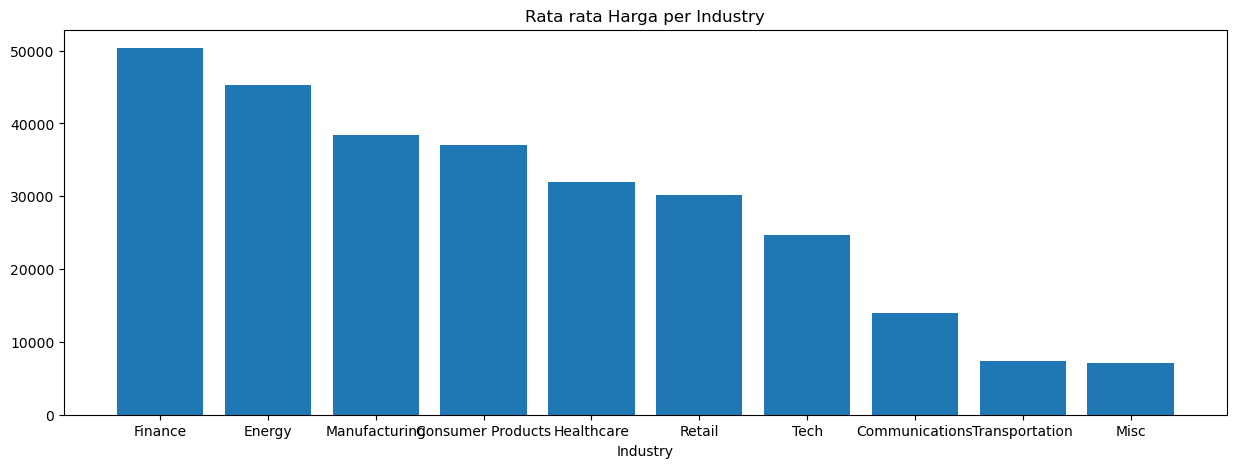

In [78]:
df_saas_per_industry = df_saas.groupby(by= "Industry")['Profit'].sum().reset_index().sort_values("Profit", ascending= False)

plt.figure(figsize=(15, 5))
plt.bar(
    df_saas_per_industry.Industry, 
    df_saas_per_industry.Profit,

)
plt.title("Rata rata Harga per Industry")
plt.xlabel("Industry")

Dapat kita lihat pada boxplot bahwa jumlah dari profit terbanyak adalah pada industry finance yang hampir menyentuh angka hampir $50.000

In [124]:
df_saas_per_industry1 = df_saas.groupby(by= "Industry")['Profit'].mean().reset_index().sort_values("Profit", ascending= False)
df_saas_per_industry1


,Industry,Profit
6,Misc,66.949804
1,Consumer Products,36.256619
2,Energy,34.409053
5,Manufacturing,31.434621
7,Retail,31.078005
4,Healthcare,30.475780
3,Finance,23.671354
0,Communications,23.568872
9,Transportation,21.090304
8,Tech,19.915084


Namun ketika kita mencari rata-rata tertinggi profit untuk sektor industry Misc mempunyai rata-rata profit tertinggi hal ini dapat dikatakan bahwa dalam quantity yang ada pada industry misc lebih banyak dari pada industry lainya  

In [114]:
df_saas_segment = df_saas['Segment'].value_counts()/len(df_saas)
df_saas_segment

Segment
SMB           0.519412
Strategic     0.302181
Enterprise    0.178407
Name: count, dtype: float64

Lalu kita melakukan analisa pada kolom segment

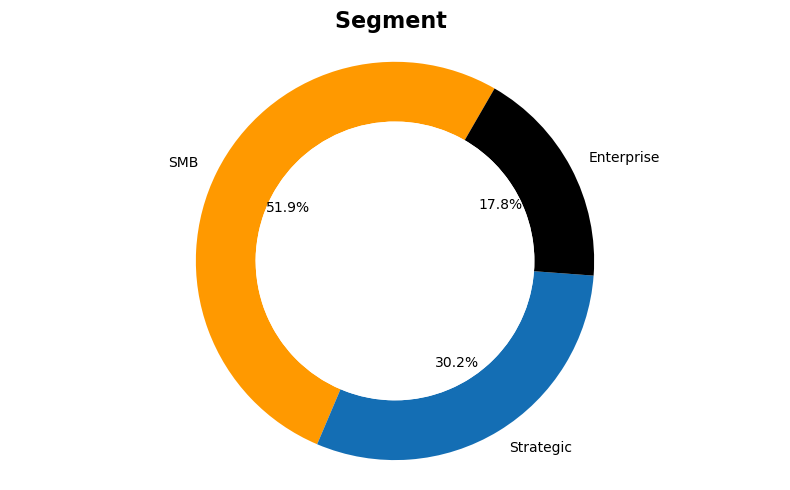

In [115]:
plt.figure(figsize=(8, 5))
colors = ['#ff9900', '#146eb4', '#000000']  
plt.pie(
    df_saas_segment.values,
    labels=df_saas_segment.index,
    autopct='%1.1f%%',
    startangle=60,
    colors=colors,
    wedgeprops=dict(width=0.3),
    textprops={'color': 'black'}
)
plt.axis('equal')
plt.title('Segment ',size=16, pad=10, fontweight='bold')
centre_circle = plt.Circle((0, 0), 0.70, fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)
plt.tight_layout()

plt.show()

Kolom segment disini adalah segmentasi dari perusahaan yang dibagi menjadi 3 bagian yaitu SMB adalah Small and Medium-sized Busines dapat diartikan perushaan membuat segmentasi ini memiliki tujuan untuk membedakan antara perusahaan costumer yang kecil ke menengah atau dalam bahasa bisa disebut dengan istilah UMKM artinya perusahaan yang baru dan masih relatif kecil namun pada pie chart dapat dilihat, SMB adalah segment yang memiliki pesanan yang paling banyak diantara 2 lainya yaitu STRATEGIC adalah segmentasi yang dapat diartikan sebagai perencanaan perusahaan Saas dengan jangka panjang sementara ENTERPRISE segmentasi yang fokusnya pada perusahaan atau organisasi besar.

In [133]:
df_saas_per_seg = df_saas.groupby(by= "Segment")['Profit'].sum().reset_index().sort_values("Profit", ascending= False)
df_saas_per_seg

,Segment,Profit
1,SMB,134119.2092
2,Strategic,91979.1340
0,Enterprise,60298.6785


Keuntungan perusahaan memiliki jumlah nilai top pada segment SMB diikuti segment Strategic dan Enterprise. Hal ini dikarenakan jumlah dari Quantity dan Sales lebih sering atau banyak jumlahnya pada segment SMB

In [129]:
df_saas_per_seg1 = df_saas.groupby(by= "Segment")['Profit'].mean().reset_index().sort_values("Profit", ascending= False)
df_saas_per_seg1

,Segment,Profit
0,Enterprise,33.818664
2,Strategic,30.456667
1,SMB,25.836873


Namun secara rata-rata segment Enterprise yang memiliki nilai top hal ini dikarenakan sales yang didapatkan dari segment Enterprise cenderung memiliki nilai yang besar meskipun quantity atau jumlah transaksi dari segment Enterprise tidak sebanyak segment SMB pada transaksinya

Text(0.5, 0, 'Profit')

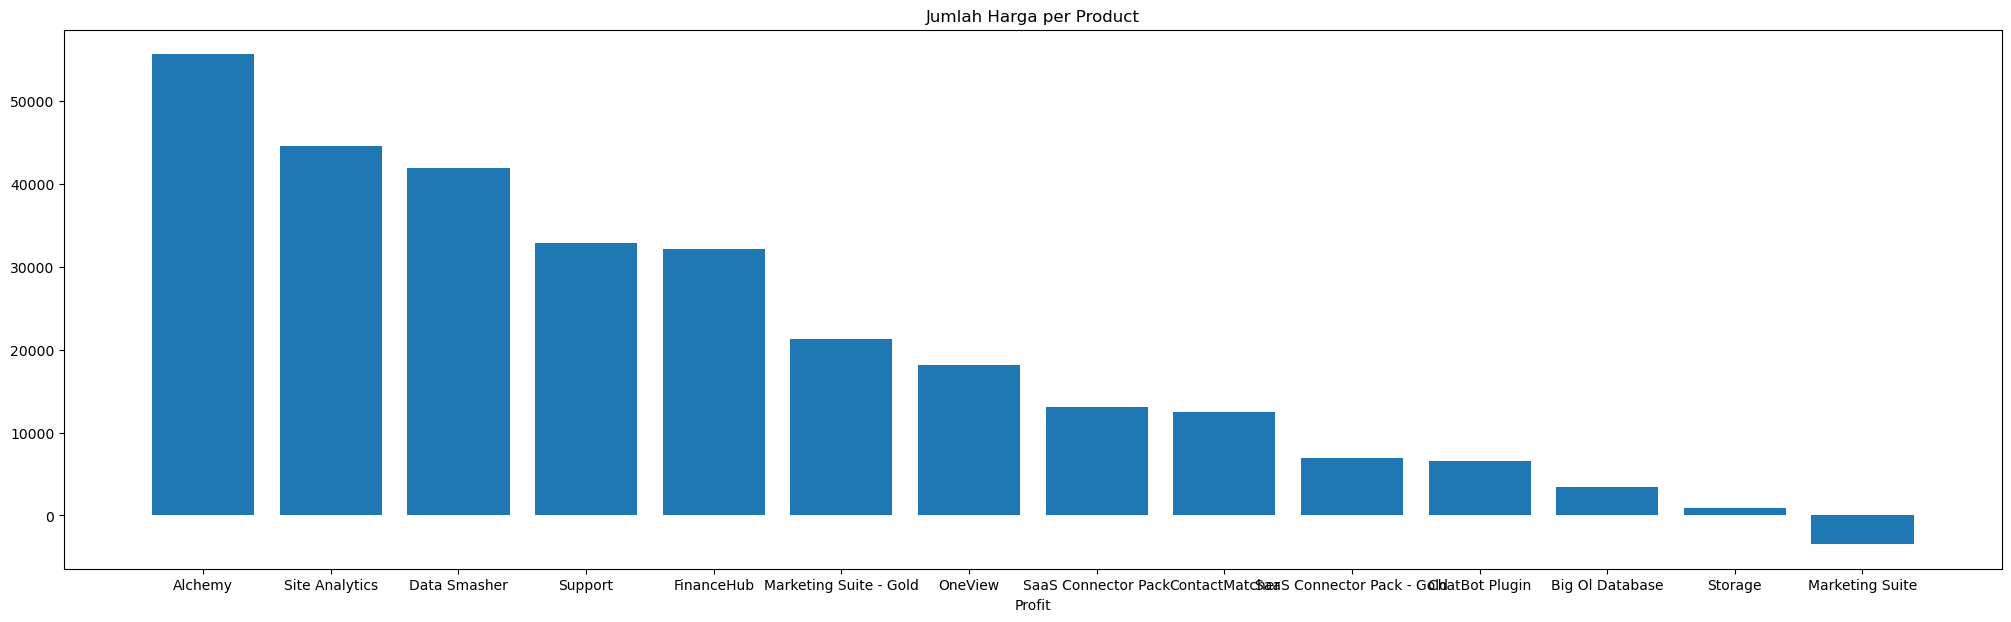

In [96]:
df_saas_product = df_saas.groupby(by= "Product")['Profit'].sum().reset_index().sort_values("Profit", ascending= False)

plt.figure(figsize=(25, 7))
plt.bar(
    df_saas_product.Product, 
    df_saas_product.Profit
)
plt.title("Jumlah Harga per Product")
plt.xlabel("Profit")

Selanjutnya dilakukan penjumlahan nilai profit berdasarkan kolom yang terdapat pada Product. Ditemukan bahwa Alchemy adalah product yang paling profitable atau dapat juga dikatakan bahwa alchemy adalah product dari AWS yang paling menguntungkan, dan ditemukan juga bahwa product dari marketing suite memliki profit yang paling sedikit bahkan minus

In [132]:
df_saas_per_seg1 = df_saas.groupby(by= "Product")['Profit'].mean().reset_index().sort_values("Profit", ascending= False)
df_saas_per_seg1

,Product,Profit
0,Alchemy,817.909190
4,Data Smasher,54.111788
11,Site Analytics,50.073938
8,OneView,38.922758
5,FinanceHub,32.758838
1,Big Ol Database,29.432669
10,SaaS Connector Pack - Gold,27.418019
7,Marketing Suite - Gold,25.152277
13,Support,21.066968
9,SaaS Connector Pack,13.645918


Secara rata-rata juga menunjukan bahwa Alchemy ini memliki nilai yang tertinggi dalam menyumbang profit paling banyak sementara marketing suite memiliki nilai yang paling rendah bahkan minus baik secara jumlah dan rata-rata.

In [139]:
df_saas_tahunan = df_saas.groupby(['Order Date', 'Industry', 'Segment', 'Product', 'Sales', 'Discount', 'Quantity'])['Profit'].sum().reset_index()
df_saas_tahunan_ind = df_saas_tahunan[df_saas_tahunan['Product'] == 'Alchemy'].sort_values(by='Profit')
df_saas_tahunan_ind

,Order Date,Industry,Segment,Product,Sales,Discount,Quantity,Profit
7122,2023-03-26,Tech,SMB,Alchemy,479.984,0.2,2,59.9980
6993,2023-03-10,Finance,SMB,Alchemy,479.984,0.2,2,59.9980
3087,2021-09-12,Transportation,SMB,Alchemy,479.984,0.2,2,59.9980
7992,2023-07-19,Finance,SMB,Alchemy,599.970,0.4,5,69.9965
4804,2022-05-31,Healthcare,Strategic,Alchemy,839.988,0.4,2,69.9990
...,...,...,...,...,...,...,...,...
5787,2022-10-05,Misc,Enterprise,Alchemy,5399.910,0.0,9,2591.9568
8983,2023-10-23,Finance,Enterprise,Alchemy,11199.968,0.2,4,3919.9888
9335,2023-11-18,Retail,SMB,Alchemy,10499.970,0.0,3,5039.9856
7100,2023-03-24,Consumer Products,SMB,Alchemy,13999.960,0.0,4,6719.9808


Dapat dilihat pada tabel group diatas bahwa product alchemy memiliki 68 transaksi dengan quantity yang berbeda pada data saas sales

In [140]:
df_saas_tahunan = df_saas.groupby(['Order Date', 'Industry', 'Segment', 'Product', 'Sales', 'Discount', 'Quantity'])['Profit'].sum().reset_index()
df_saas_tahunan_ind = df_saas_tahunan[df_saas_tahunan['Product'] == 'Marketing Suite'].sort_values(by='Profit')
df_saas_tahunan_ind

,Order Date,Industry,Segment,Product,Sales,Discount,Quantity,Profit
3145,2021-09-17,Tech,SMB,Marketing Suite,3083.4300,0.50,7,-1665.0522
4031,2021-12-24,Transportation,SMB,Marketing Suite,590.0580,0.70,7,-786.7440
2002,2021-01-03,Transportation,SMB,Marketing Suite,1352.3976,0.32,9,-437.5404
8805,2023-10-03,Tech,SMB,Marketing Suite,217.7640,0.70,6,-384.7164
2685,2021-06-28,Finance,Strategic,Marketing Suite,482.9400,0.50,6,-376.6932
...,...,...,...,...,...,...,...,...
5897,2022-10-22,Tech,Strategic,Marketing Suite,1043.9200,0.00,4,271.4192
5021,2022-07-01,Retail,SMB,Marketing Suite,1266.8600,0.00,7,291.3778
7546,2023-05-20,Tech,SMB,Marketing Suite,1628.8200,0.00,9,374.6286
4114,2022-01-08,Energy,Strategic,Marketing Suite,1565.8800,0.00,6,407.1288


Kemudian dalam product Marketing suite ada 228 transaksi yang terjadi dengan discount dan quantity yang beragam, maka data tersebut perlu dianalisa lebih lanjut mengenai runtutan apa saja yang terjadi pada product ini

In [148]:
df_saas_tahunan['Month'] = df_saas_tahunan['Order Date'].dt.to_period('M')
df_saas_tahunan['Year'] = df_saas_tahunan['Order Date'].dt.to_period('Y')
df_saas_tahunan

,Order Date,Industry,Segment,Product,Sales,Discount,Quantity,Profit,Order Month,Order Year,Month,Year
0,2020-01-04,Manufacturing,SMB,Support,16.448,0.2,2,5.5512,2020-01,2020,2020-01,2020
1,2020-01-05,Retail,Enterprise,ContactMatcher,3.540,0.8,2,-5.4870,2020-01,2020,2020-01,2020
2,2020-01-05,Retail,Enterprise,FinanceHub,11.784,0.2,3,4.2717,2020-01,2020,2020-01,2020
3,2020-01-05,Retail,Enterprise,Marketing Suite - Gold,272.736,0.2,3,-64.7748,2020-01,2020,2020-01,2020
4,2020-01-06,Manufacturing,SMB,ChatBot Plugin,19.536,0.2,3,4.8840,2020-01,2020,2020-01,2020
...,...,...,...,...,...,...,...,...,...,...,...,...
9987,2023-12-31,Finance,SMB,Marketing Suite,323.136,0.2,4,12.1176,2023-12,2023,2023-12,2023
9988,2023-12-31,Finance,SMB,Site Analytics,90.930,0.0,7,2.7279,2023-12,2023,2023-12,2023
9989,2023-12-31,Finance,Strategic,ContactMatcher,13.904,0.2,2,4.5188,2023-12,2023,2023-12,2023
9990,2023-12-31,Finance,Strategic,ContactMatcher,20.720,0.2,2,6.4750,2023-12,2023,2023-12,2023


Untuk mengetahui lebih lanjut data ditambahkan berdasarakan datetime atau tanggal, ditambahkan kolom Month dan year yang dihasilkan dari split data Order date

In [152]:
df_ms = df_saas_tahunan[df_saas_tahunan["Product"] == "Marketing Suite"]
df_ms

,Order Date,Industry,Segment,Product,Sales,Discount,Quantity,Profit,Order Month,Order Year,Month,Year
25,2020-01-14,Tech,SMB,Marketing Suite,333.9990,0.15,3,3.9294,2020-01,2020,2020-01,2020
32,2020-01-15,Finance,Strategic,Marketing Suite,61.9600,0.50,4,-53.2856,2020-01,2020,2020-01,2020
40,2020-01-20,Energy,SMB,Marketing Suite,181.4700,0.70,5,-320.5970,2020-01,2020,2020-01,2020
71,2020-01-27,Manufacturing,Strategic,Marketing Suite,141.9600,0.00,2,39.7488,2020-01,2020,2020-01,2020
78,2020-02-01,Energy,SMB,Marketing Suite,290.6660,0.15,2,3.4196,2020-02,2020,2020-02,2020
...,...,...,...,...,...,...,...,...,...,...,...,...
9848,2023-12-20,Healthcare,SMB,Marketing Suite,102.0180,0.70,7,-183.6324,2023-12,2023,2023-12,2023
9883,2023-12-23,Healthcare,Strategic,Marketing Suite,220.9800,0.00,1,50.8254,2023-12,2023,2023-12,2023
9946,2023-12-26,Tech,SMB,Marketing Suite,191.9840,0.20,2,4.7996,2023-12,2023,2023-12,2023
9957,2023-12-29,Consumer Products,SMB,Marketing Suite,78.8528,0.32,2,-11.5960,2023-12,2023,2023-12,2023


Selanjutnya kita dapat berfokus terhadap data bedasarkan product Marketing Suite 

In [163]:
profit_ms_mon = df_ms.groupby('Month')[["Profit"]].mean().reset_index()
profit_ms_mon.head()

,Month,Profit
0,2020-01,-82.55110
1,2020-02,3.41960
2,2020-03,-47.07500
3,2020-04,-18.14700
4,2020-05,-94.81075


Dilakukan pengurutan data berdasarkan rata-rata profit penjualan product Marketing sales setiap bulananya

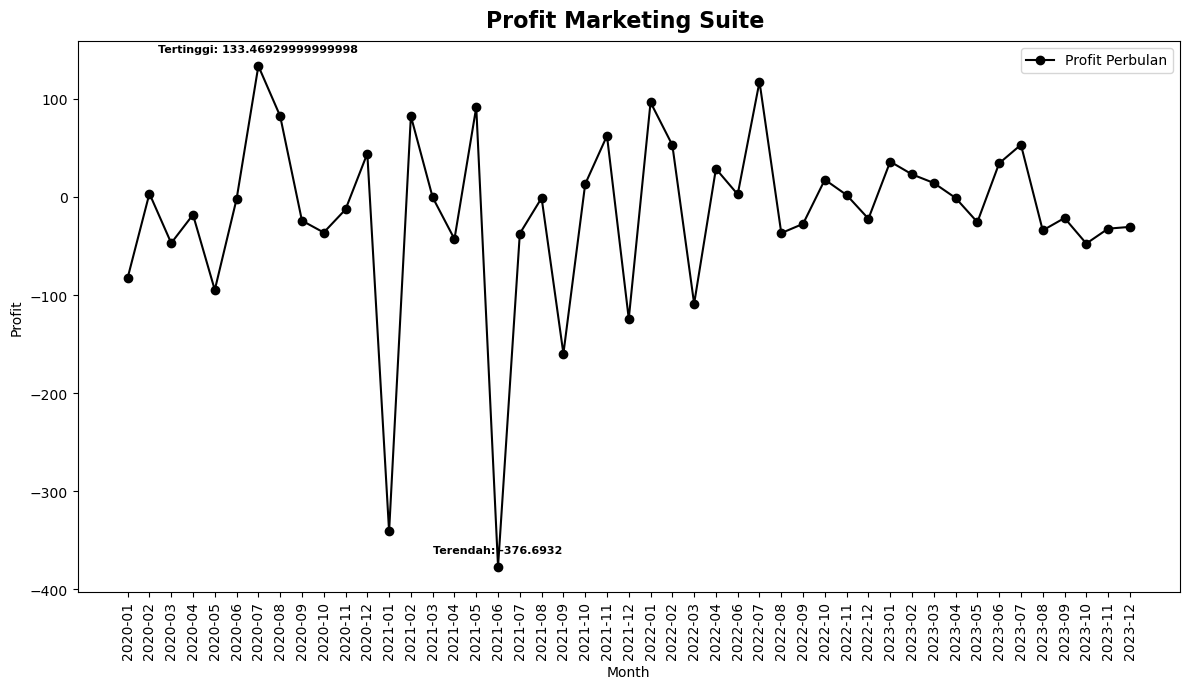

In [188]:
plt.figure(figsize=(12, 7))
profit_val = profit_ms_mon['Profit']
plt.plot(profit_ms_mon['Month'].astype(str), profit_val, marker='o', linestyle='-', color='Black', label='Profit Perbulan')

max_index = profit_val.idxmax()
min_index = profit_val.idxmin()

plt.annotate(f"Tertinggi: {profit_ms_mon['Profit'][max_index]}", 
             (profit_ms_mon['Month'].astype(str)[max_index], profit_val[max_index]),
             textcoords="offset points", xytext=(0,10), ha='center', fontsize=8, fontweight='bold')
plt.annotate(f"Terendah: {profit_ms_mon['Profit'][min_index]}", 
             (profit_ms_mon['Month'].astype(str)[min_index], profit_val[min_index]),
             textcoords="offset points", xytext=(0,10), ha='center', fontsize=8, fontweight='bold')

plt.xlabel('Month')
plt.ylabel('Profit')
plt.title('Profit Marketing Suite ', size=16, pad=10, fontweight='bold')
plt.xticks(rotation=90)
plt.legend()
plt.tight_layout()

plt.show()

Dapat dilihat pada gambar bahwa data marketing suite cenderung lebih banyak mengalami minus, terlebih pada bulan 06-2021 memliki rata-rata minus paling tinggi yakni $-376.69 dan memiliki nilai rata-rata profit tertinggi pada bulan 07-2020 yakni sebesar $133.46

In [159]:
sales_ms_mon = df_ms.groupby('Month')[["Sales"]].mean().reset_index()
sales_ms_mon.head()

,Month,Sales
0,2020-01,179.847250
1,2020-02,290.666000
2,2020-03,568.815333
3,2020-04,308.499000
4,2020-05,320.315500


Dilakukan groping data product marketing suite mengenai rata-rata sales tiap bulanya

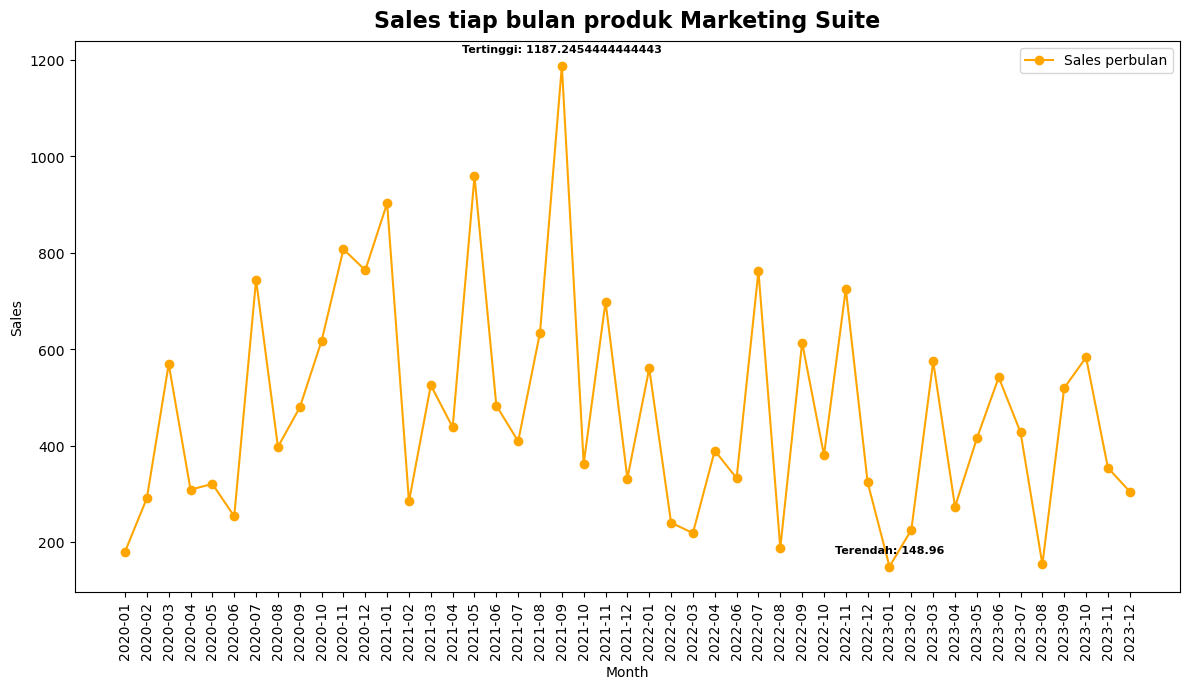

In [189]:
plt.figure(figsize=(12, 7))
sales_val = sales_ms_mon['Sales']
plt.plot(sales_ms_mon['Month'].astype(str), sales_val, marker='o', linestyle='-', color='Orange', label='Sales perbulan')

max_index = sales_val.idxmax()
min_index = sales_val.idxmin()

plt.annotate(f"Tertinggi: {sales_ms_mon['Sales'][max_index]}", 
             (sales_ms_mon['Month'].astype(str)[max_index], sales_val[max_index]),
             textcoords="offset points", xytext=(0,10), ha='center', fontsize=8, fontweight='bold')
plt.annotate(f"Terendah: {sales_ms_mon['Sales'][min_index]}", 
             (sales_ms_mon['Month'].astype(str)[min_index], sales_val[min_index]),
             textcoords="offset points", xytext=(0,10), ha='center', fontsize=8, fontweight='bold')

plt.xlabel('Month')
plt.ylabel('Sales')
plt.title('Sales tiap bulan produk Marketing Suite', size=16, pad=10, fontweight='bold')
plt.xticks(rotation=90)
plt.legend()
plt.tight_layout()

plt.show()

Secara sales dapat dilihat bahwa tidak ada yang aneh melainkan data sales cenderung memliki nilai yang relatif tinggi seperti yang tercatat memiliki nilai rata-rata terndah sebesar $148.96 dan rata-rata penjualan sales tertinggi perbulanya terdapat pada bulan 9 tahun 2021 dengan nilai $1187.24

In [160]:
dis_ms_mon = df_ms.groupby('Month')[["Discount"]].mean().reset_index()
dis_ms_mon.head()

,Month,Discount
0,2020-01,0.337500
1,2020-02,0.150000
2,2020-03,0.266667
3,2020-04,0.150000
4,2020-05,0.325000


Melihat data rata-rata sales Market suite normal maka dilakukan juga analisa penjualan per bulan pada discount hal ini bertujuan untuk melihat sejauh mana discount produck Market suite ini diberikan

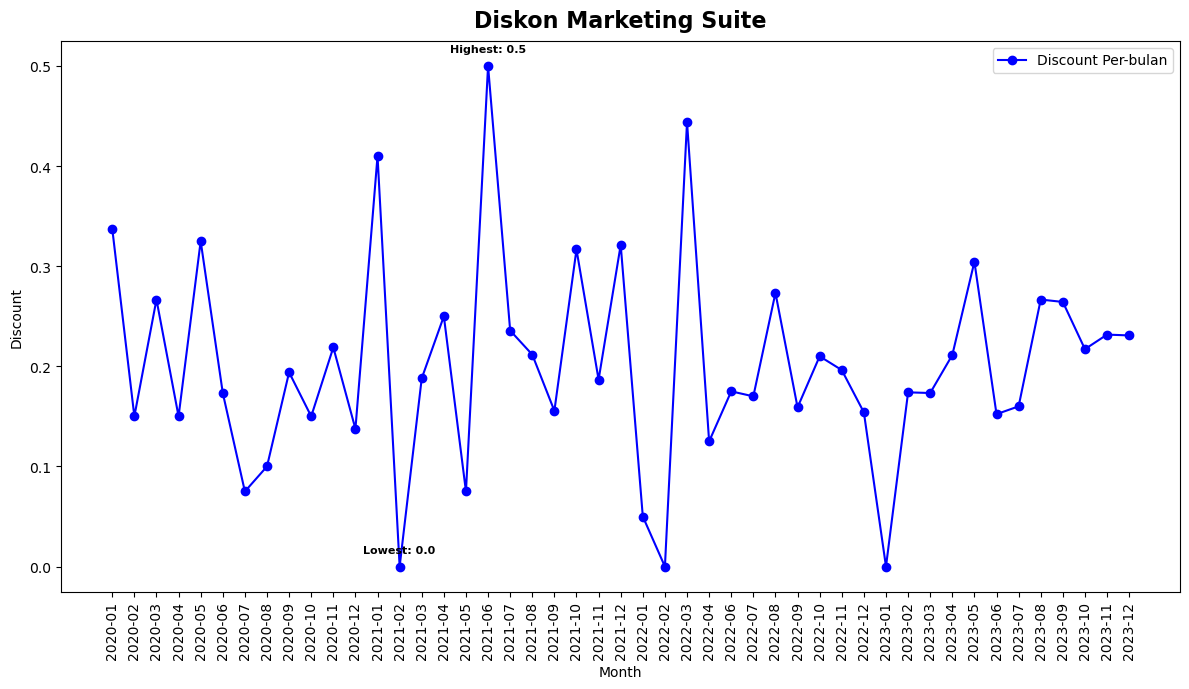

In [186]:
plt.figure(figsize=(12, 7))
discount_values = dis_ms_mon['Discount']
plt.plot(dis_ms_mon['Month'].astype(str), discount_values, marker='o', linestyle='-', color='Blue', label='Discount Per-bulan')

max_index = discount_values.idxmax()
min_index = discount_values.idxmin()

plt.annotate(f"Highest: {dis_ms_mon['Discount'][max_index]}", 
             (dis_ms_mon['Month'].astype(str)[max_index], discount_values[max_index]),
             textcoords="offset points", xytext=(0,10), ha='center', fontsize=8, fontweight='bold')
plt.annotate(f"Lowest: {dis_ms_mon['Discount'][min_index]}", 
             (dis_ms_mon['Month'].astype(str)[min_index], discount_values[min_index]),
             textcoords="offset points", xytext=(0,10), ha='center', fontsize=8, fontweight='bold')

plt.xlabel('Month')
plt.ylabel('Discount')
plt.title('Diskon Marketing Suite', size=16, pad=10, fontweight='bold')
plt.xticks(rotation=90)
plt.legend()
plt.tight_layout()

plt.show()

Dapat kita lihat pada grafik tabel diatas hampir setiap bulanya rata-rata product dari Market suite ini diberikan discount, hanya terdapat 3 bulan saja yang nilai discount dengan rata-rata 0 hal ini dapat diasumsikan bahwa pemberian discount pada product market suite ini sangat massive diberikan.

# Korelasi

Setelah kita perhatikan analisa yang terjadi maka dapat kita lakukan sebuah korelasi diantara discount dan profit, hal ini bertujuan untuk mengetahui sejauh mana discount akan berpengaruh terhadap profit perusahaan

In [173]:
df_saas[['Discount', 'Profit']].corr(method= "pearson")

,Discount,Profit
Discount,1.000000,-0.219487
Profit,-0.219487,1.000000


Korelasi Variabel:

* Range bernilai 0 sampai 1
* Korelasi Kuat Positif : 0 sampai 1
* Korelasi Kuat Negatif : 0 sampai -1

Semakin mendekati nol -> korelasi lemah

Menggunakan korelasi pearson dapat kita asumsikan bahwa profit mengandung korelasi yang negatif

In [174]:
df_saas[['Sales', 'Discount', 'Profit','Quantity']].corr(method= "spearman")

,Sales,Discount,Profit,Quantity
Sales,1.000000,-0.056969,0.518407,0.327426
Discount,-0.056969,1.000000,-0.543350,-0.000878
Profit,0.518407,-0.543350,1.000000,0.234491
Quantity,0.327426,-0.000878,0.234491,1.000000


Korelasi kita tambahkan lagi dengan nilai numerik yang ada pada dataset dimana kita dapat mencari korelasi atau hubungan antara Sales, Discount, Profit dan Quantity

Text(0.5, 1.0, 'Korelasi Fitur Numerik di Dataset Tip')

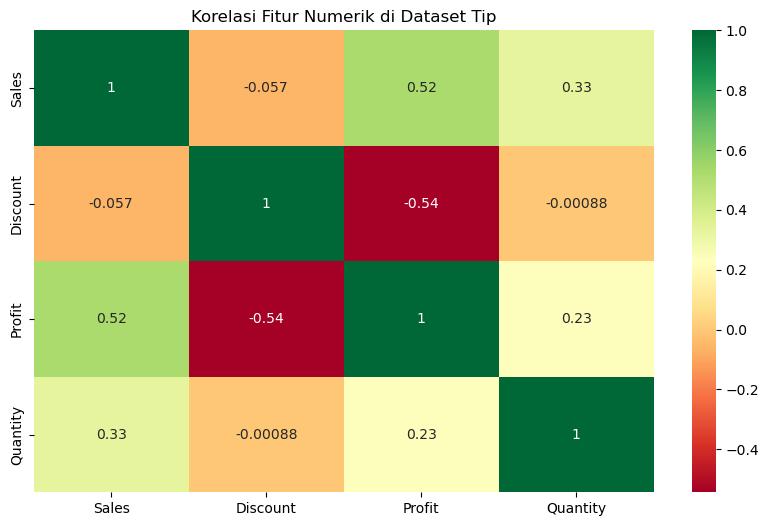

In [197]:
plt.figure(figsize= (10, 6))
sb.heatmap(
    df_saas[['Sales', 'Discount', 'Profit', 'Quantity']].corr(method= "spearman"),
    annot= True,
    cmap = 'RdYlGn'
)

plt.title("Korelasi Fitur Numerik di Dataset Tip")

* Sales :
Korelasi yang dihasilkan menggunakan metode spearman pada data sales memilki korelasi positif yakni 0.52 artinya korelasi positif kuat, sementara sales tidak berkorelasi signifikan pada pemberian discount yang cenderung 0 bahkan negatif, lalu pada quantity yang hanya 0.33 saja.
* Discount :
Terdapat korelasi kuat negatif terhadap profit, artinya pengaruh dari pemberian discount berkorelasi dengan keuntungan atau profit. Sementara yang lainya juga memliki korelasi yang negatif mesikipun nilainya tidak sebesar korelasi dengan profit
* Profit :
Nilai yang terdapat pada korelasi profit memliki kecenderungan yang kuat pada discount memiliki nilai -0.54 yang dapat diasumsikan sebagai korelasi kuat negatif sementara korelasi dengan sales memliki korelasi kuat positif dengan nilai 0.52 dan dengan quantity hanya bernilai 0 cenderung ke negatif
* Quantity :
Pada heatmap diatas korelasi Quantity terhadap Sales, Discount dan profit cenderung memiliki nilai yang rendah meskipun tidak terdapat nilai korelasi negatif namun nilainya dibawah 0,5 yang kita asumsikan bahwa korelasi quantity ini tidak berpengaruh signifikan 

# Kesimpulan dan Rekomendasi 

Dari analisis yang telah dilakukan, kita bisa membuat kesimpulan bahwa data penjualan perusahaan AWS Saas ini sebagai berikut:
 * Data sebanyak 9994 yang kita miliki, hanya 4 data saja yang dapat kita analisis secara numerikal yaitu Sales, Discount, Profit dan Quantity.
 * Data numerikal tersebut tidak berdistribusi normal, artinya sangat sulit untuk dilakukan sebuah forecasting atau prediksi kedepanya.
 * Rentang atau range yang terdapat pada data Profit dan Sales memiliki fluktuasi yang sangat besar dan signifikan.
 * Alchemy diasumsikan sebagai produk yang paling menguntungkan dari data AWS saas sales ini baik dari segi rata-rata maupun jumlahnya.
 * Market suite adalah produk yang paling merugikan secara profit dimana nilai dari rata-rata dan jumlahnya adalah minus.

Hasil dari analisis dan kesimpulan didapatkan sebuah rekomendasi atau insight yang dapat diambil dan menjawab sebuah permasalahan yaitu Bagaimana cara yang tepat untuk meningkatkan profit perusahaan secara efektif maka sebagai berikut:
 * Jika berkaca pada product yang memiliki rata-rata dan jumlah nilai yang tinggi untuk dilakukan keberlanjutan strategi yang telah diterapkan, mengingat berdasarkan top 5 data product ditemukanya pemberian discount artinya sudah ada strategi dari setiap productnya.
 * Memperbaiki strategi bisnis yang telah diterapkan pada segment dan industry dengan cara meningkatkan yang masih belum memliki profit signifikan sehingga diharapkan dapat membantu profitable perusahaan.
 * Melihat korelasi antar data numerikal satu satunya cara meningkatkan profit perusahaan adalah dengan meningkatkan sales, namun ini akan berbenturan dengan pemberian discount dimana salah satu cara atau strategi perusahaan agar menarik costumer melakukan transaksi dengan cara pemberian discount.
 * Pemberian Discount masih belum tepat sasaran berdasarkan product dari Market Suite, hal ini berdampak buruk bagi profit perusahaan sebaiknya selaku tim marketing perusahaan lebih meningkatkan efektifitas kapan discount diberikan jika berkaca pada product Market Suite yang memiliki rata-rata discount setiap bulanya.
 * Peningkatan profit perusahaan dapat efektif apabila semua strategi yang dilakukan untuk meningkatkan sales dan pemberian discount sudah tepat sasaran dari segi bisnis.